# Optimisation, `solve()`, `subs()` and `evalf()`

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import sympy as sp
import math

Usually, when we are performing Lagrange optimisation, the problem is formulated as such:

$$
\mathcal{L}(x,y,\lambda) = f(x,y) + \lambda \ g(x,y)
$$

Here, $f(x,y)$ is the function we which to optimise _on_. Where as $g(x,y)$ is the function we want to apply as a _constraint_.

A useful example is the function $f(x,y) = x^2 y^2 +5$

## Graphical Optimisation

## Question 1: 

Examine the code below. 

Using the visuals and adjusting values, attempt to guess values for the maximum of the function.

_This approach can be useful when a problem is time-consuming (or impossible) to solve analytically and precision isn't paramount._

Text(0.5, 0, 'z')

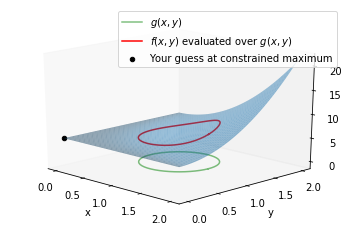

In [67]:
# 3D plot setup
fig = plt.figure()
ax = fig.gca(projection='3d')

# Create boundaries of f(x,y)
x = np.linspace(0,2)
y = np.linspace(0,2)

# Create 2D domain of f(x,y)
xf, yf = np.meshgrid(x,y)

# Discrete version of f(x,y) over 2D domain
fxy = (xf**2)*(yf**2) + 5

# Plot our function to be optimised f(x,y)
ax.plot_surface(xf, yf, fxy, alpha=0.5)
ax.view_init(20,-45)

# Generate points for constraint function g(x,y)
theta = np.linspace(0,2*np.pi)
r = 0.5  # radius
xg = r*np.cos(theta) + 1
yg = r*np.sin(theta) + 1

# Create g(x,y)
ax.plot(xg, yg, color='g', alpha=0.5, label='$g(x,y)$')
gxy = (xg**2)*(yg**2) + 5
ax.plot(xg, yg, gxy, label='$f(x,y)$ evaluated over $g(x,y)$', color='r')


#####################################
# Your guess here
xp = [0]
yp = [0]
zp = [5]
ax.scatter(xp, yp, zp, color='k', label='Your guess at constrained maximum')
#####################################

# Make it pretty
ax.grid(False)
ax.legend()
plt.locator_params(nbins=5) # Amount of numbers per axis
# Label our axes
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

## Symbolic Optimisation

This method makes use of methods covered in previous notebooks and the `sympy.solve()` function.

The documentation for this new function can be found online for your particular version of `sympy`, but a pragmatic run-through will be given here.

### `sympy.solve()`

Equations (or even relational expressions) are passed to `solve()` in a list. If the expression is an equation, it should be expressed such that it is equal to zero.

### One Equation 

e.g. Let's solve

$$
x^2 = 64
$$

In [70]:
from sympy import solve, Symbol
x = Symbol('x')
f = x**2 - 64  # Notice that the expression is set up to be equal to zero.

sols = solve(f,x)
display(sols)

### More than One Equation

Take the system of equations:

$$
x + 2y -z = 5
$$

$$
2x - y -z = 0
$$

$$
-x -y +3z = 8
$$

We have to express these as equal to zero, so:

$$
x + 2y -z - 5 = 0
$$

$$
2x - y -z = 0
$$

$$
-x -y +3z -8 = 0
$$

and then we can use them in `sympy.solve()`.

In [74]:
# Adding our new symbols
y = Symbol('y')
z = Symbol('z')

# All equations equal to zero
f1 = x + 2*y - z - 5
f2 = 2*x - y - z 
f3 = -x -y +3*z - 8

sols = solve([f1,f2,f3], (x,y,z))  # Returns a dictionary (dict)

display(sols)

This is the same equation used in the 'Matrices' notebook -- first looked at when inverting matrices to solve sets of linear equations. These two methods can be looked at as an example of two different ways to obtain the same solution. You could also theoretically create a matrix version of Lagrange Optimisation (however the logic for generating the matrix from partial derivatives requires some time).

## Actually Doing Symbolic Optimisation in Python

Let's take a look at:

$$
f(x,y) = x^2 + y^2
$$

Constrained by:

$$
xy = 1
$$

Meaning that:

$$ 
g(x,y) = xy - 1
$$

Hence:

$$
\mathcal{L} = f(x,y) + \lambda \ g(x,y)
$$

where $\lambda$ is our unknown Lagrange multiplier.

In [61]:
# Creating our lagrangian
lmbda = sp.Symbol('λ')
sp.init_printing()
x = sp.Symbol('x')
y = sp.Symbol('y')
f = (x**2)+(y**2)
g = x*y - 1

display('Our Lagrangian')
L  = f + lmbda*g
display(L)

display('Partial Derivatives')
Lx = sp.diff(L,x)
Ly = sp.diff(L,y)
Ll = sp.diff(L, lmbda)
display(Lx)
display(Ly)
display(Ll)

'Our Lagrangian'

'Partial Derivatives'

In [62]:
extrema = sp.solve([Lx, Ly, Ll], (x,y,lmbda))

for i in range(len(extrema)):
    display(extrema[i])

Because we are examining the function in the real domain ($\mathbb{R}$) we can ignore the solutions that contain
$i$.

# Question 2: 

Create two plots.

## (a)

Using `matplotlib` (`plt`) to display the function $f(x,y)$, $g(x,y)$ as well as the **real** extrema obtained by symbolic calculation above.

## (b)

A contour plot (using `plt.contour()`) of $f(x,y)$ and the constrained maxima points obtained by symbolic calculation. 

Note: If you do not recall how to create a contour plot, look at the `plt` documentation for `contour()` or the other notebook titled 'Partial Derivatives'.

# Answer 2:

# Question 3:

_(Using what you now have seen about the symbolic method of solving Lagrange Optimisation problems)_

For the function 

$$
f(x,y) = x^2 y 
$$

subject to the constraint 

$$ 
x^2 + 2y^2 = 6
$$

find the lagrange multipliers and the extrema.

## Answer 3:

## Evaluating Partial Derivatives at Points and Along Curves

Say we have some function $f(x(t),y(t))$. Then the _total derivative_ with respect to $t$ would be:

$$
\frac{df}{dt} = 
\frac{\partial f}{\partial x} \frac{d x}{dt} +
\frac{\partial f}{\partial y} \frac{d y}{dt} 
$$

Let's calculate the total derivative of:

$$
f(x,y) = 2x^2 + y^2
$$

along the parametric path:

$$
\langle x(t), y(t) \rangle =
\langle \cos(t), \sin(t) \rangle
$$

'Total Derivative'

'Plot of f(x,y)'

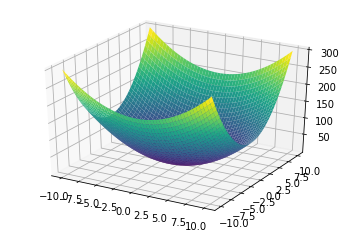

'The path we are taking the derivative along in xy plane.'

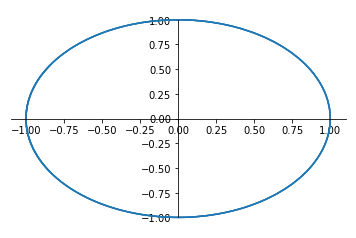

'Total derivative df/dt along curve <x(t), y(t)>'

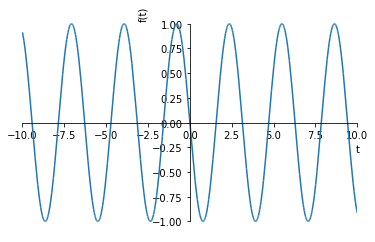

In [99]:
from sympy.plotting import plot3d, plot_parametric
t = Symbol('t')

# Function and its partial derivatives.
f = 2*x**2 + y**2 
fx = sp.diff(f,x)
fy = sp.diff(f,y)

# Contour to evaluate df/dt over
xc = sp.cos(t)
yc = sp.sin(t)

# Substitution
fxc = fx.subs(x, xc)
fyc = fy.subs(y,yc)

# dx/dt and dy/dt of path in xy plane.
dxc_dt = sp.diff(xc, t)
dyc_dt = sp.diff(yc, t)


display('Total Derivative')
dfdt = fxc*dxc_dt+fyc*dyc_dt
display(dfdt)


display('Plot of f(x,y)')
plot3d(f)


display('The path we are taking the derivative along in xy plane.')
plot_parametric(xc,yc )


display('Total derivative df/dt along curve <x(t), y(t)>')
sp.plot(dfdt)



## Question 4:

Plot 